In [1]:
# import lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv('Store_Sales.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# **Data Preprocessing**

In [3]:
# check duplicated values
df[df.duplicated(keep = False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


there are duplicated values

In [4]:
# drop duplicated values
df.drop_duplicates(inplace = True)

In [5]:
df['Country'].unique()

array(['United States'], dtype=object)

In [6]:
# drop useless features like country because it contain only US and postal code
df.drop(['Country', 'Postal Code'], axis = 1,inplace = True)

In [7]:
# look again to dataset
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# **Exploratory Data Analysis**

<Axes: >

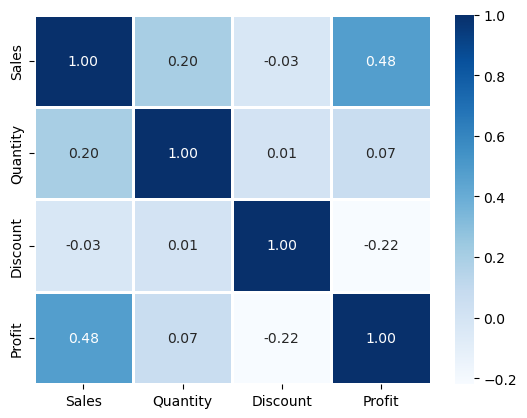

In [8]:
# check correlation
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(),
            annot=True,
            cmap = "Blues", 
            linecolor = 'w',
            fmt='.2f',
            linewidths = 1)

# **Check profit, sales and discount**

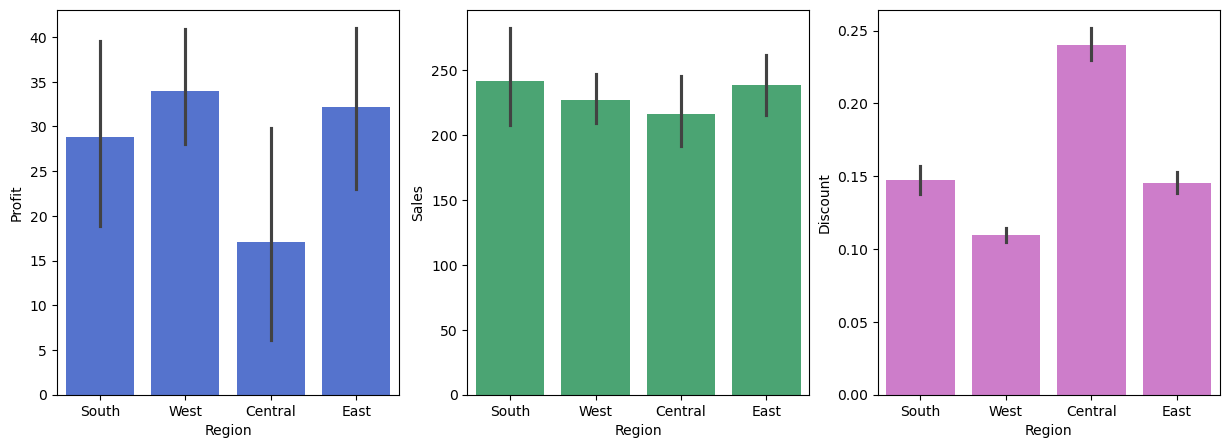

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x='Region', y='Profit', data=df, ax=ax[0], color='royalblue')  # Blue for Profit
sns.barplot(x='Region', y='Sales', data=df, ax=ax[1], color='mediumseagreen')  # Green for Sales
sns.barplot(x='Region', y='Discount', data=df, ax=ax[2], color='orchid')  # Purple for Discount

plt.show()


* West - the highest profit and the West region - the lowest discount
* South - the highest sales
* Central - the lowest profit - the highest discount

# For each category

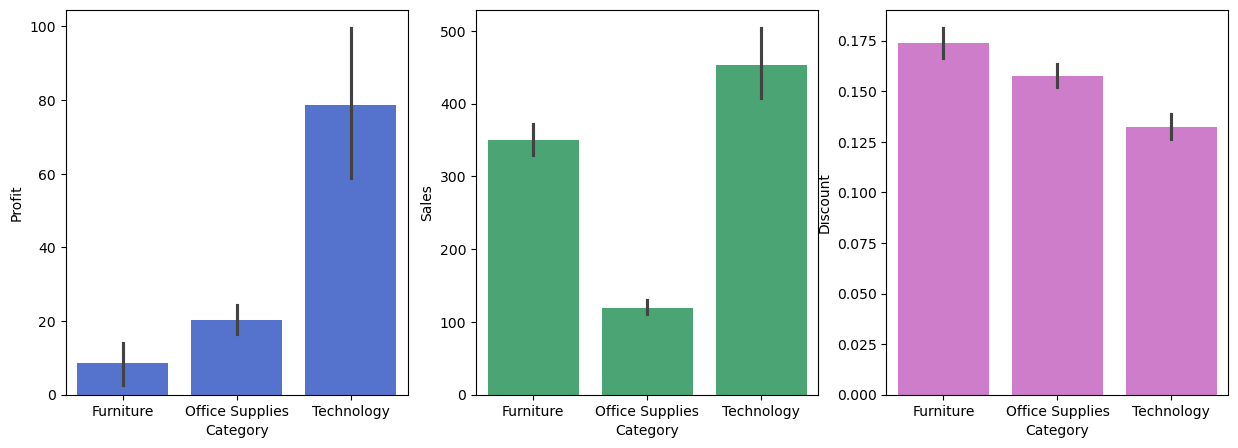

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot with colors for each category
sns.barplot(x='Category', y='Profit', data=df, ax=ax[0], color='royalblue')
sns.barplot(x='Category', y='Sales', data=df, ax=ax[1], color='mediumseagreen')
sns.barplot(x='Category', y='Discount', data=df, ax=ax[2], color='orchid')

plt.show()


* Furniture has the highest sales rate but has low profit, seems the discount to be the reason

# For each Segment

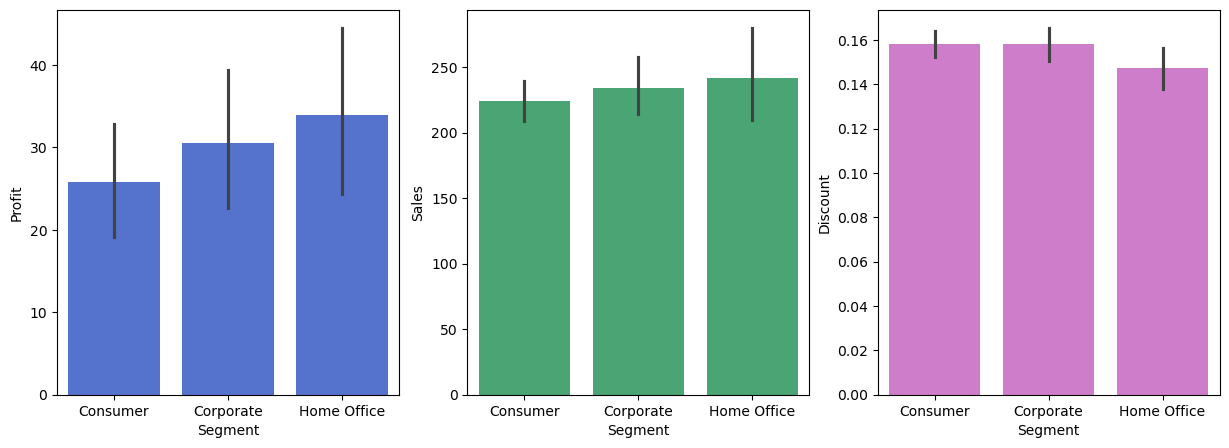

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot with colors for each category
sns.barplot(x='Segment', y='Profit', data=df, ax=ax[0], color='royalblue')
sns.barplot(x='Segment', y='Sales', data=df, ax=ax[1], color='mediumseagreen')
sns.barplot(x='Segment', y='Discount', data=df, ax=ax[2], color='orchid')

plt.show()

* Home Office has the lowest dicount but has also the highest profit in sales

# For each ship mode

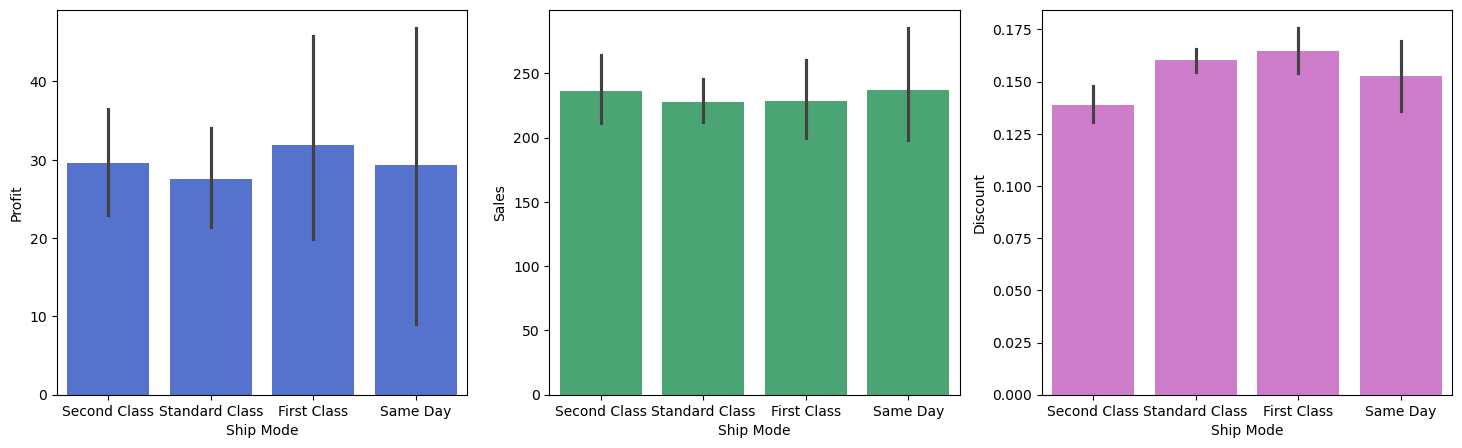

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot with colors for each category
sns.barplot(x='Ship Mode', y='Profit', data=df, ax=ax[0], color='royalblue')
sns.barplot(x='Ship Mode', y='Sales', data=df, ax=ax[1], color='mediumseagreen')
sns.barplot(x='Ship Mode', y='Discount', data=df, ax=ax[2], color='orchid')

plt.show()

* Same day shipping has the highest sales
* First class has highest discount but also highest profit

# For quantity

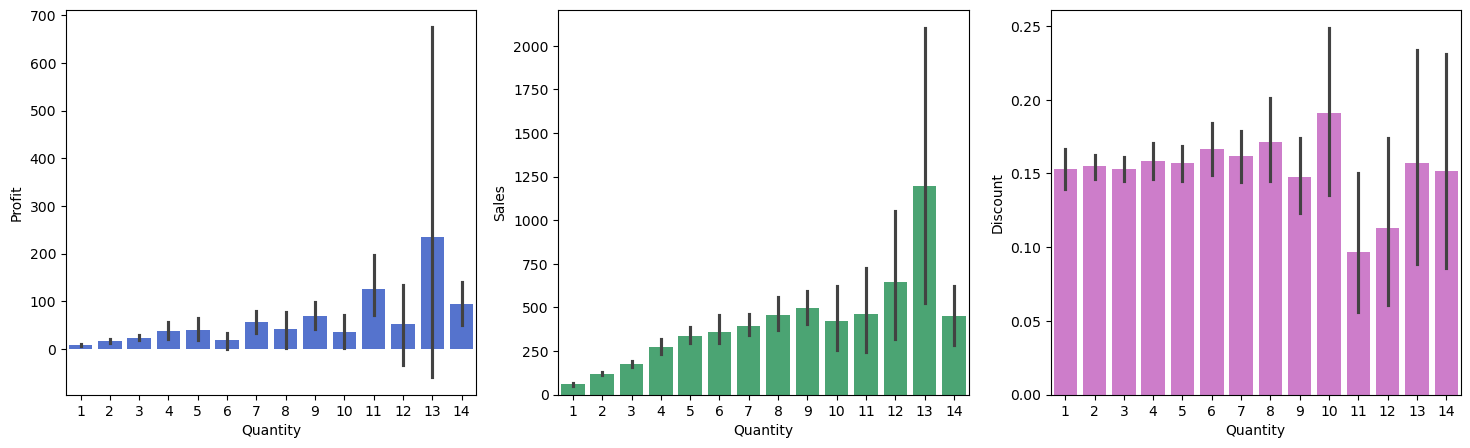

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot with colors for each category
sns.barplot(x='Quantity', y='Profit', data=df, ax=ax[0], color='royalblue')
sns.barplot(x='Quantity', y='Sales', data=df, ax=ax[1], color='mediumseagreen')
sns.barplot(x='Quantity', y='Discount', data=df, ax=ax[2], color='orchid')

plt.show()

* Quantity 13 is the highest in sales and profit but number 10 is the highest in discount but gain lower profit
* We need to find a balance between quantity and discount

# Check discount with sales and profit

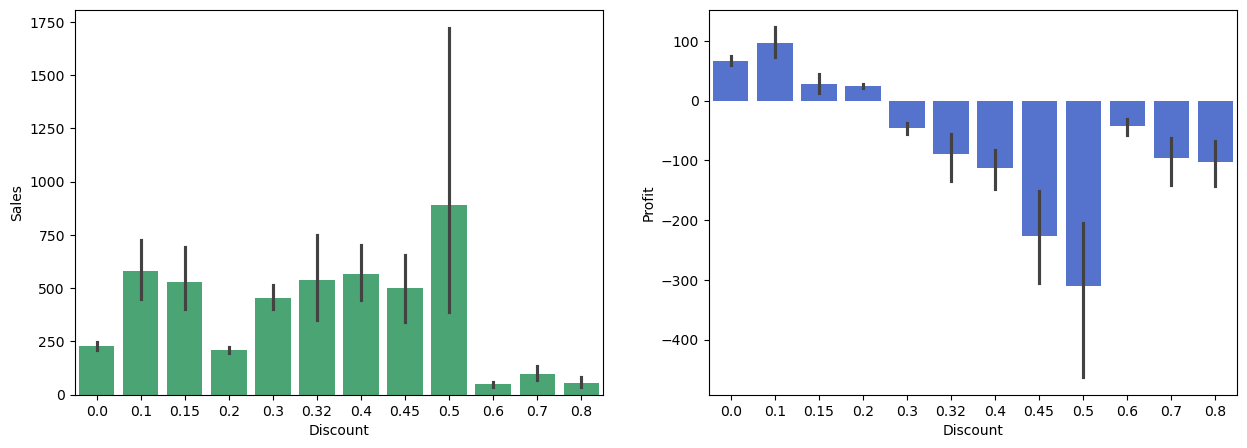

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot with colors for each category
sns.barplot(x='Discount', y='Sales', data=df, ax=ax[0], color='mediumseagreen')
sns.barplot(x='Discount', y='Profit', data=df, ax=ax[1], color='royalblue')

plt.show()

* When the discount is high, the profit is negative

# Check Category and Sub-Category

<Axes: xlabel='Category', ylabel='count'>

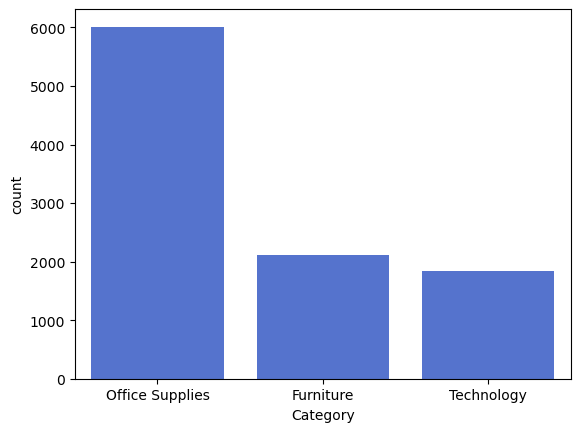

In [15]:
# check number of each category
sns.countplot(x='Category', data=df, color='royalblue', order=df['Category'].value_counts().index)

* Office Supplies has the highest number

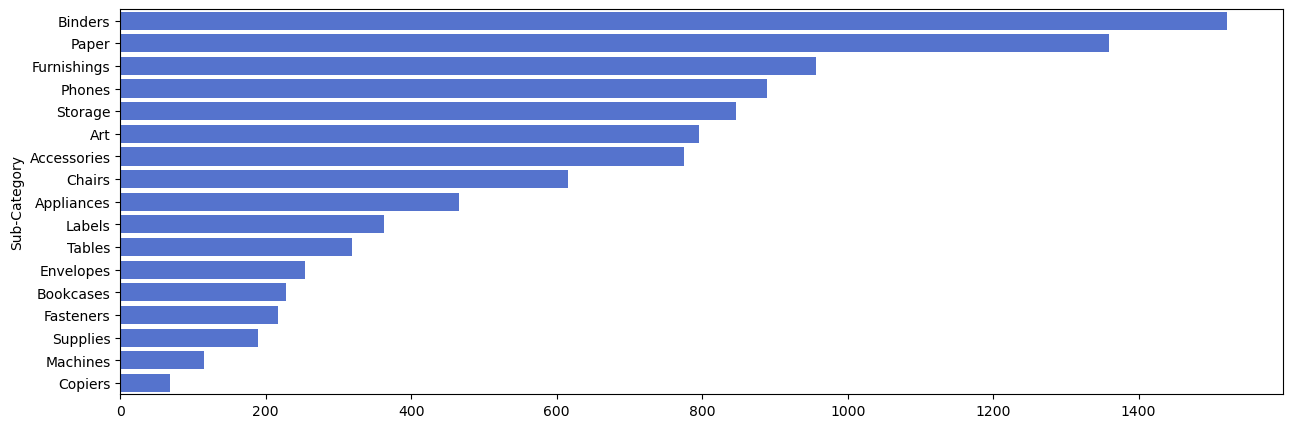

In [16]:
# check number of each sub-category
plt.figure(figsize=(15, 5))
counts = df['Sub-Category'].value_counts()
sns.barplot(x=counts.values, y=counts.index, color='royalblue')
plt.show()

* Sales of Binders as Paper are the highest

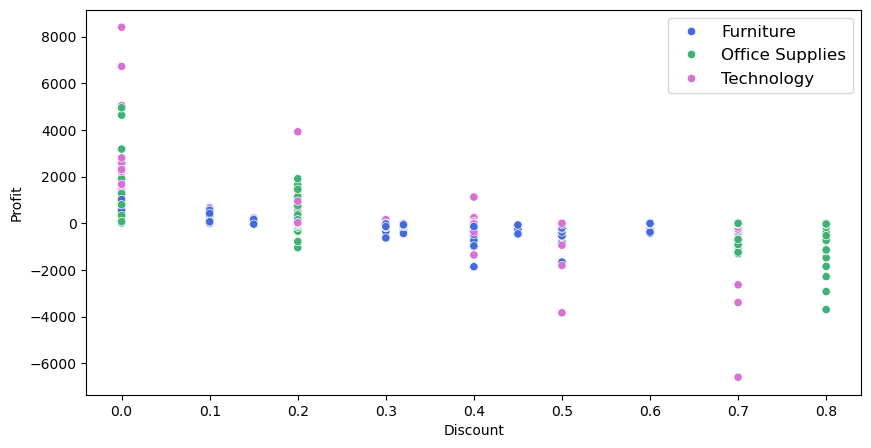

In [17]:
# check category with discount and profit
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Discount', y='Profit', hue='Category', data=df, palette=['royalblue', 'mediumseagreen', 'orchid'])
ax.legend(fontsize=12)
plt.show()


* Office Supplies has maximum loss at 80% discount
* Furniture and Technology have maximum loss between 30% to 50%
* Technology also has maximum loss profit at 70%

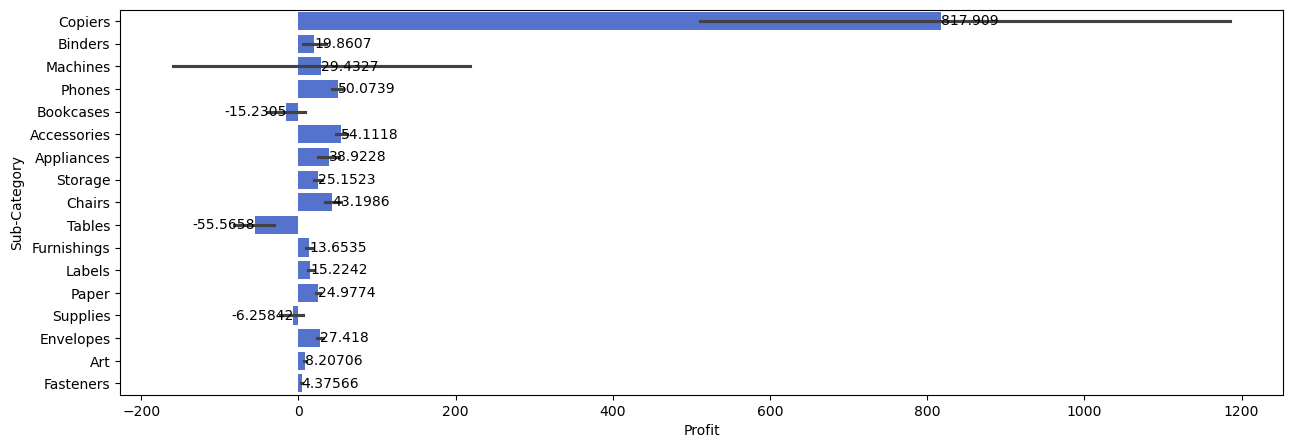

In [18]:
# check Sub-category with profit
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Profit', y='Sub-Category', color='royalblue', data=df.sort_values('Profit', ascending=False), ax=ax)
plt.yticks(rotation=0)
ax.bar_label(ax.containers[0])
plt.show()


* Tables and Supplies and Bookases have negative profit

# **Analysis states**

In [19]:
# group by with each state
states = df.groupby('State').sum().sort_values('Sales', ascending=False)
states.reset_index(inplace=True)

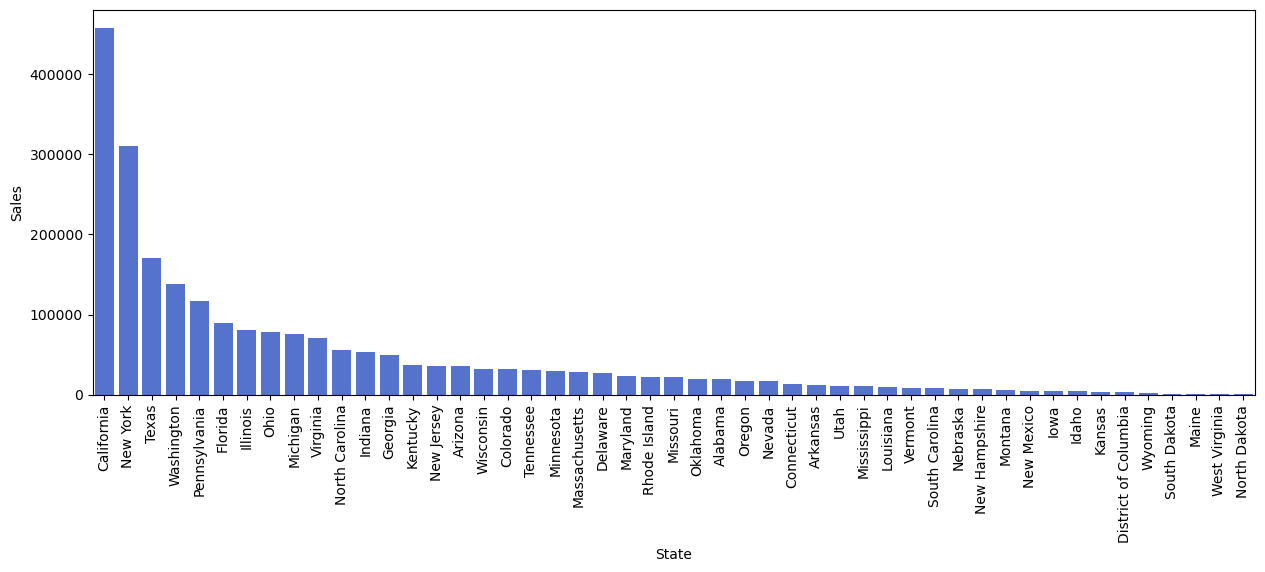

In [20]:
# check sales
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='State', y='Sales', color='royalblue', data=states)
plt.xticks(rotation=90)
plt.show()

* California and New York have the maximum sales

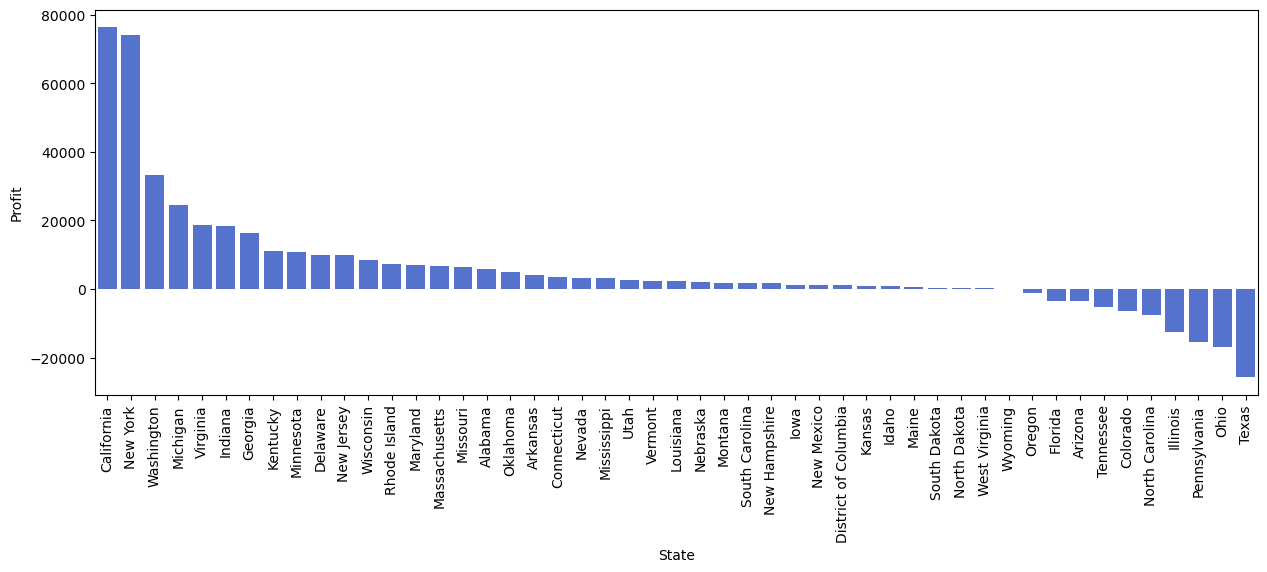

In [21]:
# check profit
fig, ax = plt.subplots(figsize=(15, 5))
states = states.sort_values('Profit', ascending=False)
sns.barplot(x='State', y='Profit', data=states, color='royalblue')
plt.xticks(rotation=90)
plt.show()


* California and New York have the highest profit

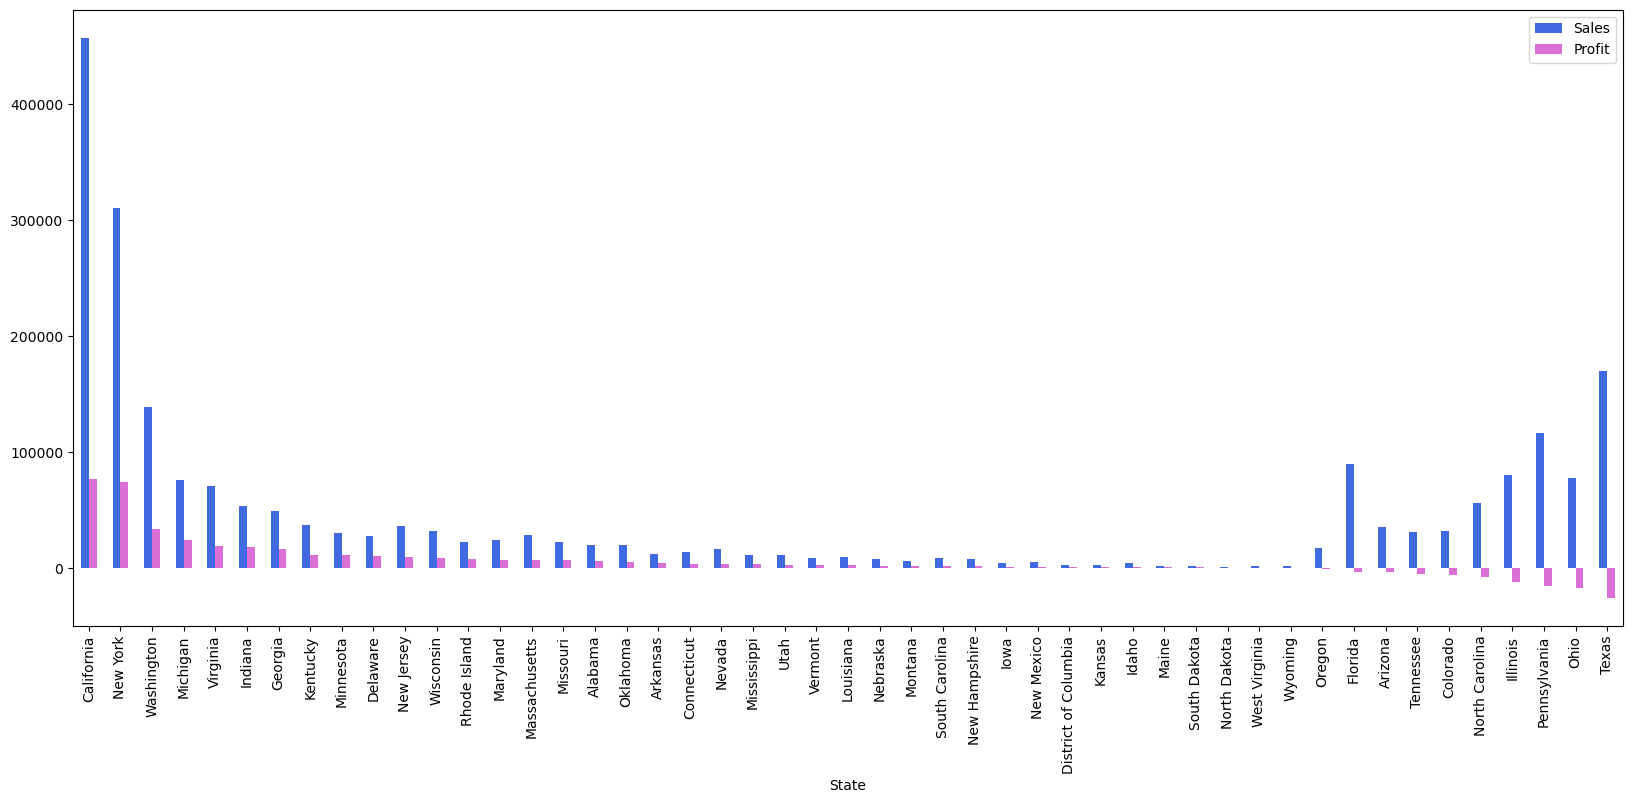

In [22]:
# Sales and profit by State
states = df.groupby(['State'])[['Sales', 'Profit']].sum()
states.sort_values("Profit", ascending=False).plot(kind='bar', figsize=(20, 8), color=['royalblue', 'orchid'])
plt.show()

* Great Sales do not equal great profit

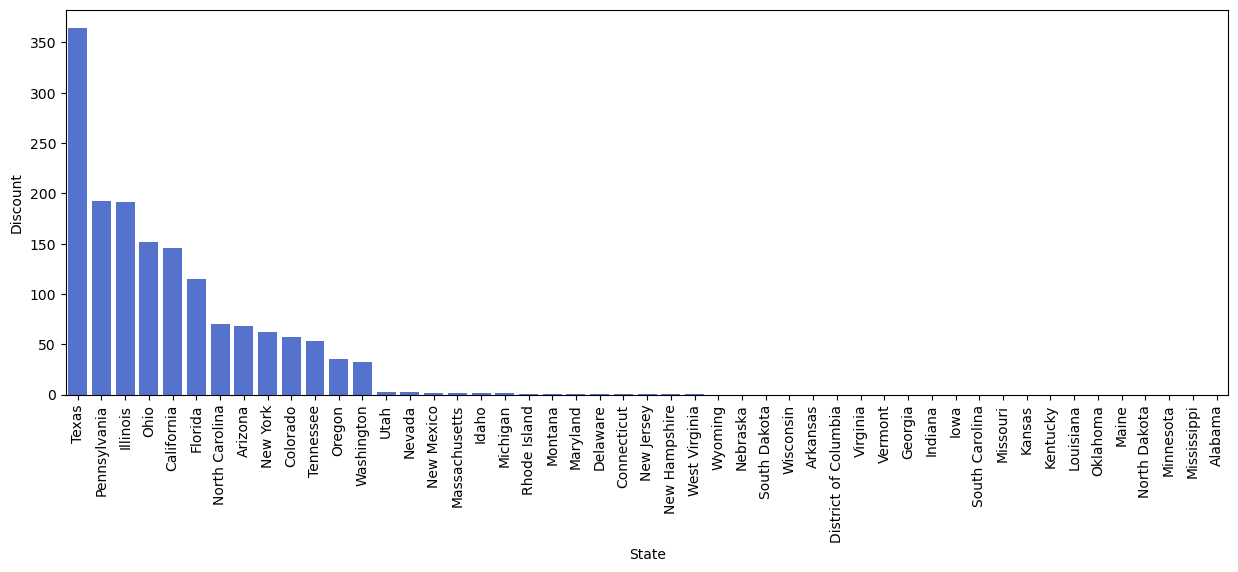

In [23]:
# Check discount for state
states = df.groupby(['State']).sum().sort_values('Discount', ascending=False)
states.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='State', y='Discount', data=states, color='royalblue')
plt.xticks(rotation=90)
plt.show()

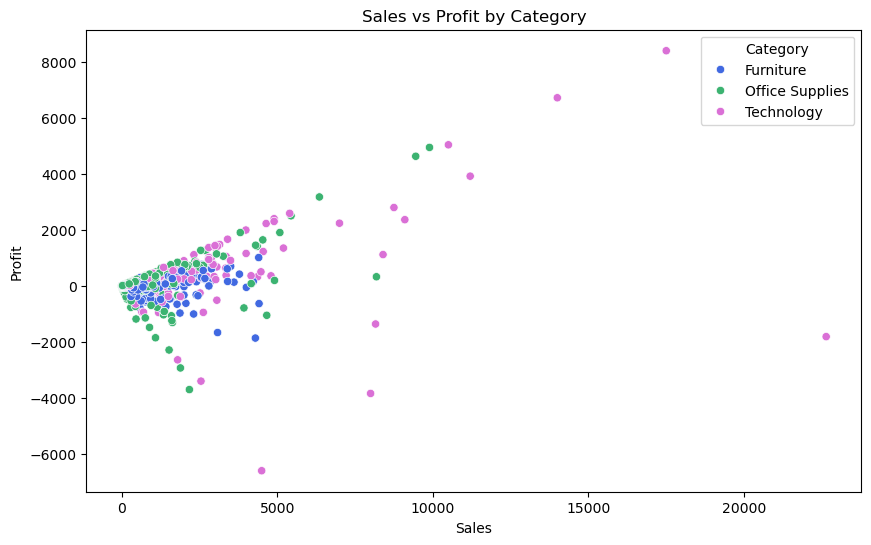

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df, palette={'Furniture': 'royalblue', 'Office Supplies': 'mediumseagreen', 'Technology': 'orchid'})
plt.title('Sales vs Profit by Category')
plt.show()


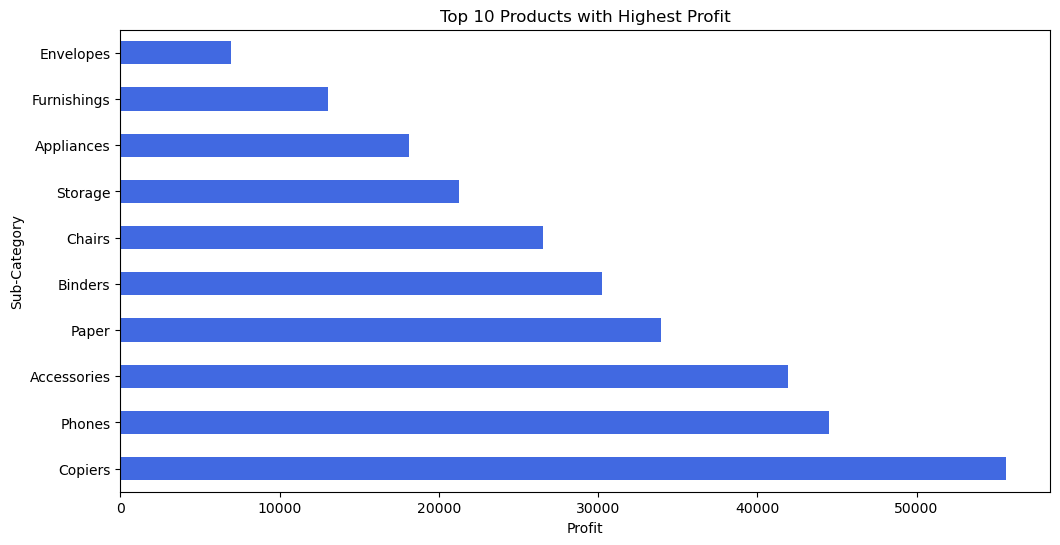

In [28]:
top_products = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(12, 6), color='royalblue')
plt.title('Top 10 Products with Highest Profit')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.show()


/var/folders/8m/rtdc6gx16_x4_t0brzgq0m140000gn/T/ipykernel_55940/824061401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Profit Margin', data=df, palette=['royalblue', 'mediumseagreen', 'orchid'])
/var/folders/8m/rtdc6gx16_x4_t0brzgq0m140000gn/T/ipykernel_55940/824061401.py:3: UserWarning: 
The palette list has fewer values (3) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Sub-Category', y='Profit Margin', data=df, palette=['royalblue', 'mediumseagreen', 'orchid'])


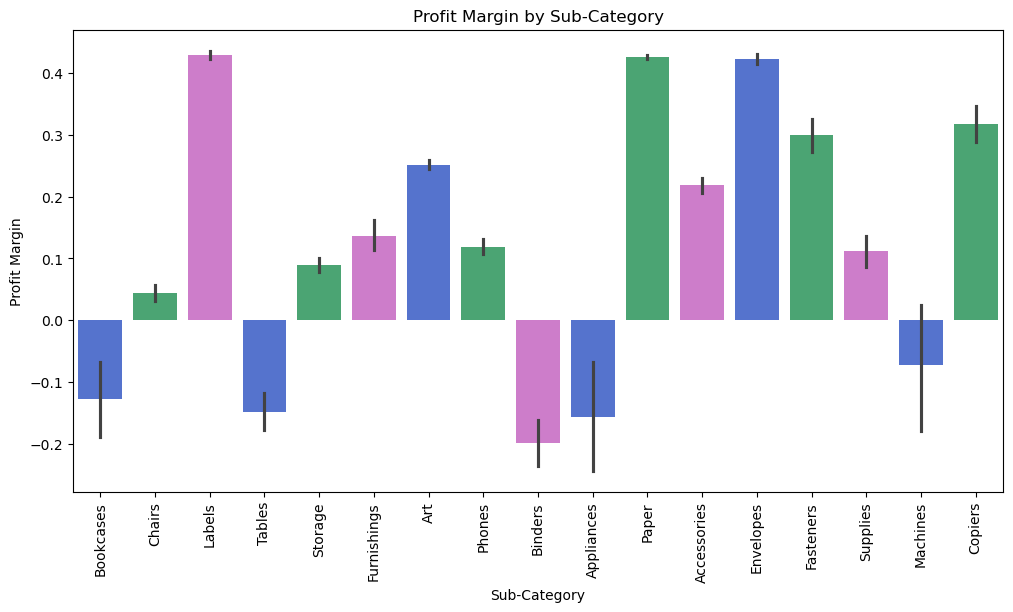

In [31]:
df['Profit Margin'] = df['Profit'] / df['Sales']
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Profit Margin', data=df, palette=['royalblue', 'mediumseagreen', 'orchid'])
plt.title('Profit Margin by Sub-Category')
plt.xticks(rotation=90)
plt.show()


# **Conclusions**

### Areas for Improvement to Boost Profit
* Sales and Profit show an inconsistent trend across most States
* The Central region requires additional focus and resources
* Furniture and Office Supplies exhibit high losses in profit alongside high discounts
* Office Supplies experience the largest loss at 80% discount and no profit at 0% discount
* Furniture and Technology show significant loss in profit, ranging from 30% to 50%
* Technology has the highest profit loss at 70% discount
* Tables, Supplies, and Bookcases in the sub-category are experiencing negative profit

### Potential Business Insights Derived from the Data
* Technology generates more profit than Furniture
* Same-day shipping results in higher sales
* The West region delivers the highest profit
* Vermont state shows strong profit despite lower sales
* Discounts of 50% and below tend to yield higher profit
* Additional discounts in Furniture may help attract more customers
* In the Consumer segment, more discounts are needed, while promoting Home-Office products could lead to higher profits